### Author: Rajesh Kumar Singh

## PROJECT 3 -Linear Regression

### Context

The data is technical spec of cars. The dataset is downloaded from UCI Machine Learning Repository

### Content

1. Title: Auto-Mpg Data

2. Sources:
(a) Origin: This dataset was taken from the StatLib library which is
maintained at Carnegie Mellon University. The dataset was
used in the 1983 American Statistical Association Exposition.
(c) Date: July 7, 1993

3. Past Usage:
See 2b (above)
Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
In Proceedings on the Tenth International Conference of Machine
Learning, 236-243, University of Massachusetts, Amherst. Morgan
Kaufmann

4. Relevant Information:This dataset is a slightly modified version of the dataset provided in
the StatLib library. In line with the use by Ross Quinlan (1993) in
predicting the attribute “mpg”, 8 of the original instances were removed
because they had unknown values for the “mpg” attribute. The original
dataset is available in the file “auto-mpg.data-original”.”The data concerns city-cycle fuel consumption in miles per gallon,
to be predicted in terms of 3 multivalued discrete and 5 continuous
attributes.” (Quinlan, 1993)
5. Number of Instances: 398
6. Number of Attributes: 9 including the class attribute
7. Attribute Information:
    1. mpg: continuous
    2. cylinders: multi-valued discrete
    3. displacement: continuous
    4. horsepower: continuous
    5. weight: continuous
    6. acceleration: continuous
    7. model year: multi-valued discrete
    8. origin: multi-valued discrete
    9. car name: string (unique for each instance)
8. Missing Attribute Values: horsepower has 6 missing values

    
#### Acknowledgements:

    Dataset: UCI Machine Learning Repository
    Data link : https://archive.ics.uci.edu/ml/datasets/auto+mpg

### Expectation
Build a Linear Regression Model to express the relationship between a car’s “mpg” and the rest of the attributes given in the dataset.

### Project Execution Details

In [3]:
#Data Preprosessing

#Importing the necessary libraries to do the above project
import numpy as np    #----is a library to do mathematical calculation
from matplotlib import pyplot as plt  #-----is a library to plot nice chart
import pandas as pd  #----is a library to import and manage dataset
import seaborn as sns    #----is a library for making statistical graphics on top of matplotlib. 
import warnings;

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from scipy.stats import skew, stats, norm

warnings.filterwarnings('ignore')

# Enable inline plotting
%matplotlib inline

#import sys #only needed to determine Python version number
#import matplotlib #only needed to determine Matplotlib version number

#print('Python version ' + sys.version)
#print('Pandas version ' + pd.__version__)
#print('Matplotlib version ' + matplotlib.__version__)

In [44]:
#Importing the dataset
ds_location = r'C:\Users\eyacdel\Documents\Total DataScience\Linear Regression\auto-mpg.csv'

#Loading the dataset
dataSet = pd.read_csv(ds_location)

#### 3. Performing basic EDA on the data

In [5]:
#Display the dataset 
#dataSet
#dataSet.head()
#dataSet.tail()
#dataSet.count()
#dataSet.dtypes
#dataSet.shape

In [6]:
# Check data type of Specific column
#dataSet.mpg.dtype

In [7]:
#Missing Data Identification in dataset
#Column wise missing value count
dataSet.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [8]:
#total missing value count in dataset
dataSet.isnull().sum().sum()

0

In [9]:
dataSet.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [10]:
print(dataSet.head())
#print(dataSet.index)
#print(dataSet.columns)

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [11]:
dataSet.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [12]:
dataSet.count()

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model year      398
origin          398
car name        398
dtype: int64

In [13]:
#Unique Value 
dataSet.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [14]:
#Dealing with missing values
data = dataSet[dataSet.horsepower != '?']

In [15]:
print('?' in data.horsepower)

False


In [16]:
#Shape of the data
data.shape

(392, 9)

In [17]:
#Data Type of each attribute
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [18]:
data.horsepower = data.horsepower.astype('float')
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [19]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [45]:
data.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

#### Plotting mpg against the other key variables to view their correlation if any

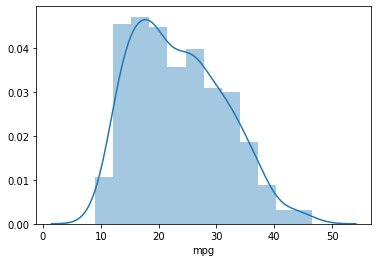

In [21]:
sns.distplot(data['mpg'])

In [22]:
#print("Skewness: %f" % data['mpg'].skew())
#print("Kurtosis: %f" % data['mpg'].kurt())

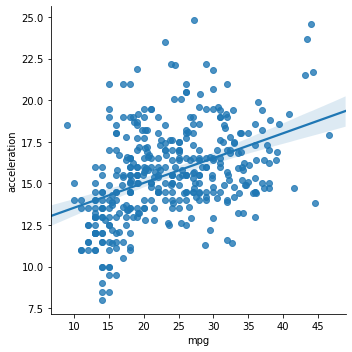

In [23]:
#Correlation between "mpg" and "acceleration"
sns.lmplot(x='mpg', y='acceleration', data=data)
plt.show()

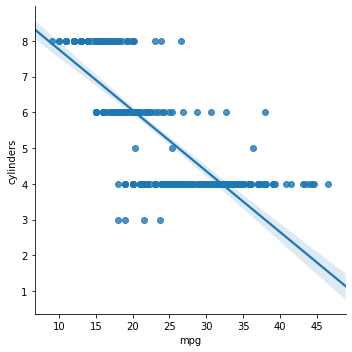

In [24]:
#Correlation between "mpg" and "cylinders"
sns.lmplot(x='mpg', y='cylinders', data=data)
plt.show()

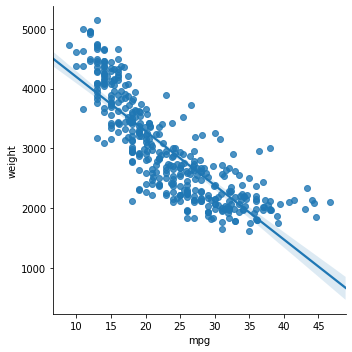

In [46]:
#Correlation between "mpg" and "weight"
sns.lmplot(x='mpg', y='weight', data=data)
plt.show()

#### Recalibrating the data to fit the final goal

In [26]:
#Dropping/Ignoring "Car name" variable
df = data.drop('car name', axis=1)

In [27]:
#df

In [31]:
#Replace Categorical variables with actual values
df['origin'] = df['origin'].replace({1:"America", 2:"Europe", 3:"Asia"})

In [32]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,America
1,15.0,8,350.0,165.0,3693,11.5,70,America
2,18.0,8,318.0,150.0,3436,11.0,70,America
3,16.0,8,304.0,150.0,3433,12.0,70,America
4,17.0,8,302.0,140.0,3449,10.5,70,America


In [33]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [34]:
#Convert catagorical variable i.e. "origin" to dummy variables
df = pd.get_dummies(df, columns=['origin'])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,0,1
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


In [35]:
#df.isna().sum()

In [36]:
df.isnull().sum()

mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
model year        0
origin_America    0
origin_Asia       0
origin_Europe     0
dtype: int64

### BiVariate Plots


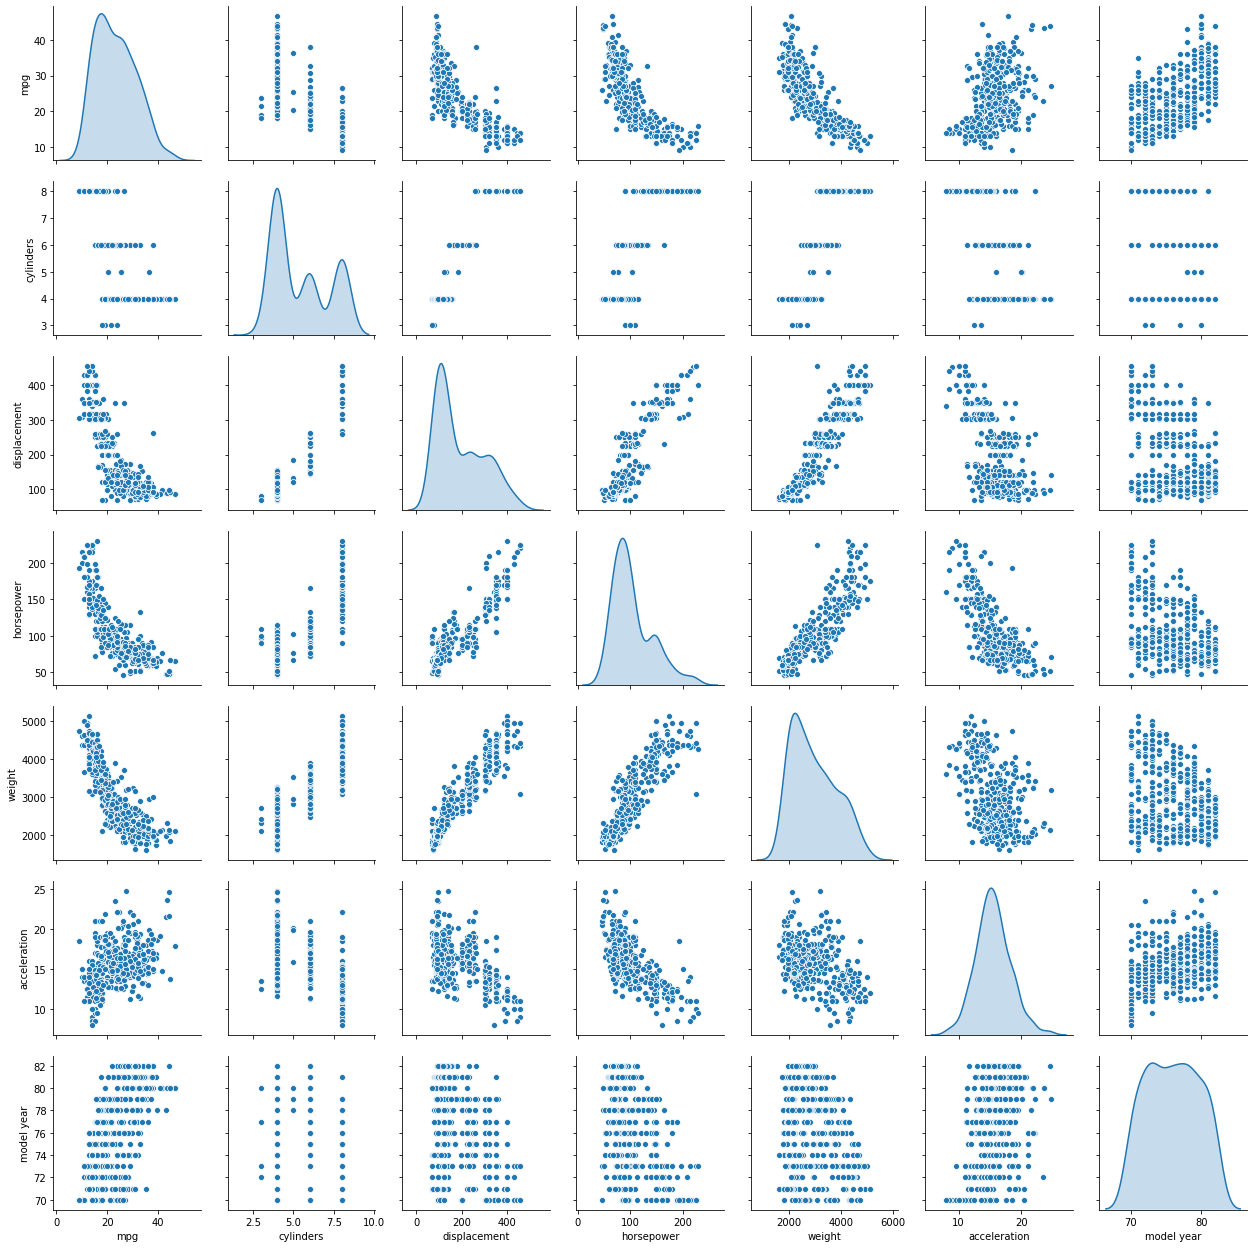

In [37]:
attr_select = df.iloc[:, 0:7]
sns.pairplot(attr_select, diag_kind='kde')

### Building our Linear Model

#### 1. Dividing data into dependent and independent variables

In [49]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,0,1
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


In [50]:
#independent variables
X = df.drop(['mpg', 'origin_Europe'], axis=1)
#dependent varibale
y = df[['mpg']]

#### 2.  Splitting X and y into training and test dataset

In [67]:
#Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

#### 3. Fit Linear Model (make our model learn)

In [60]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
regression_model.coef_

array([[-2.32509254e-01,  2.45825956e-02, -1.48890324e-03,
        -7.61188242e-03,  2.80132661e-01,  7.74684971e-01,
        -2.59904083e+00,  1.21355105e-01]])

In [62]:
# The coefficients for each variable
for indx, col_name in enumerate(X_train.columns):
    print("Coefficient of {} is {}".format(col_name, regression_model.coef_[0][indx]))

Coefficient of cylinders is -0.23250925374176584
Coefficient of displacement is 0.02458259564982087
Coefficient of horsepower is -0.0014889032367725865
Coefficient of weight is -0.007611882424290455
Coefficient of acceleration is 0.28013266086228544
Coefficient of model year is 0.774684971294415
Coefficient of origin_America is -2.599040830425158
Coefficient of origin_Asia is 0.1213551053938668


In [63]:
# intercept are
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -18.92499588163324


In [64]:
# The score (R^2) for in-sample and out of sample
regression_model.score(X_train, y_train)

0.8205337631867141

In [68]:
#out of sample score (R^2)

regression_model.score(X_test, y_test)

0.8242172817490034

In [69]:
X_test

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia
82,4,120.0,97.0,2506,14.5,72,0,1
167,4,97.0,75.0,2171,16.0,75,0,1
356,4,108.0,75.0,2350,16.8,81,0,1
120,4,121.0,112.0,2868,15.5,73,0,0
385,4,91.0,67.0,1995,16.2,82,0,1
...,...,...,...,...,...,...,...,...
60,4,140.0,90.0,2408,19.5,72,1,0
12,8,400.0,150.0,3761,9.5,70,1,0
305,4,151.0,90.0,2670,16.0,79,1,0
165,8,262.0,110.0,3221,13.5,75,1,0


In [71]:
regression_model.predict(X_test)

array([[23.83567423],
       [28.59726492],
       [32.37736248],
       [22.01588437],
       [35.28019321],
       [28.14163774],
       [26.55945716],
       [12.57219984],
       [25.63744107],
       [32.0953011 ],
       [23.40186073],
       [32.21377673],
       [20.20455071],
       [31.80347979],
       [29.52579591],
       [14.74734514],
       [29.86523971],
       [33.12612966],
       [11.05583483],
       [23.03764967],
       [27.03713766],
       [17.98215689],
       [17.970493  ],
       [16.10744901],
       [10.85311295],
       [20.09330878],
       [31.84106862],
       [18.50652465],
       [21.76656008],
       [28.94836323],
       [21.95017154],
       [24.40318225],
       [10.27943191],
       [28.67974388],
       [20.91743998],
       [14.33883247],
       [17.08346441],
       [21.499123  ],
       [35.17239049],
       [24.59637251],
       [16.31300567],
       [11.94917488],
       [22.42178229],
       [22.36191917],
       [22.15963237],
       [18

#### The R-squared for the regression model on the left is 15%, and for the model on the right it is 82%.